Prepare rules for the all the data sets - "my_movies"
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import warnings

In [2]:
# Suppress Warnings
warnings.filterwarnings('ignore')

In [3]:
# Load Dataset
df = pd.read_csv('my_movies.csv')
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


### EDA

In [4]:
# Display the top few rows of the DataFrame
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [5]:
# Display the bottom few rows of the DataFrame
df.tail()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [6]:
df = df.iloc[:, 5:]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 932.0 bytes


Inference drawn from df.info():

   - The DataFrame contains 10 entries (rows)..
   - All columns have the data type int64, indicating they store integer values.
   - There are no missing values in any of the columns.


In [8]:
df.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Inference drawn from df.describe()

- The mean values provide the proportion of purchases for each movie.
- For example, on average, 60% of customers purchased "Sixth Sense," 70% purchased "Gladiator," and so on.
- The standard deviation measures the amount of variation or dispersion of a set of values.
- Movies like "Sixth Sense," "Gladiator," and "Patriot" have higher standard deviations, indicating more variability in purchases.
- The minimum and maximum values indicate the range of the data.
- For binary data representing purchases (0 or 1), the min is 0 (not purchased) and max is 1 (purchased).
- The percentiles provide information about the distribution of purchases.
- has For example, 75% of customers purchased "Sixth Sense," 25% purchased "Gladiator," and so on.
n so on.


In [9]:
# Calculate count
count = df.sum()

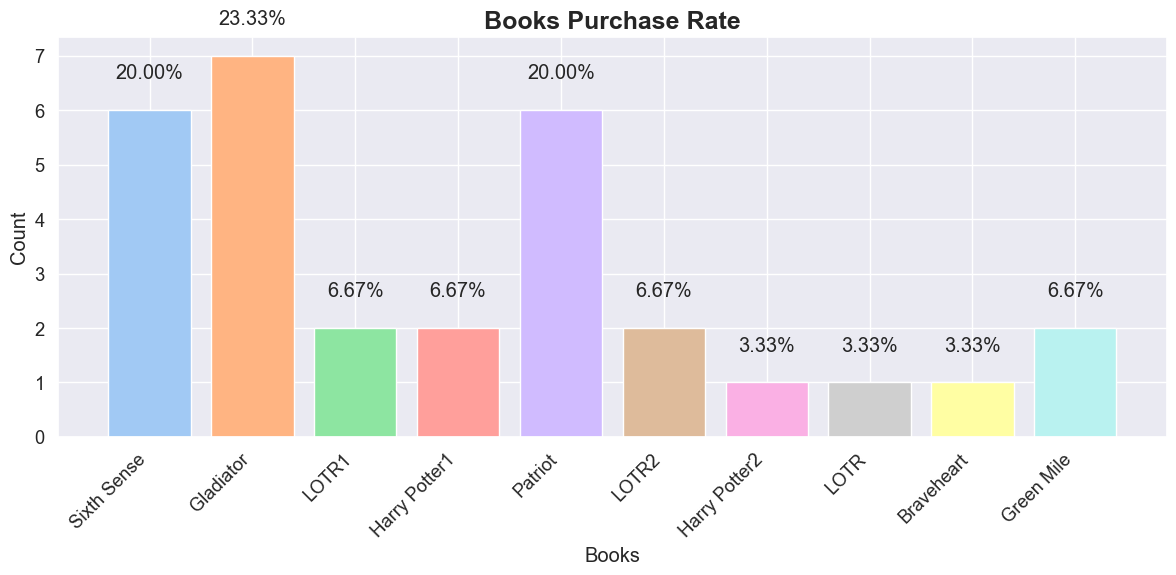

In [10]:
# Visualization of data
plt.figure(figsize=(12, 6))
sns.set(font_scale=1.2)
colors = sns.color_palette('pastel')[0:len(df.columns)]

# Create a vertical bar chart with rotated labels
bars = plt.bar(df.columns, df.sum(), color=colors)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels

# Add labels and title
plt.xlabel('Books')
plt.ylabel('Count')
plt.title('Books Purchase Rate', fontsize=18, fontweight='bold')

# Add percentages on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{yval/df.sum().sum()*100:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

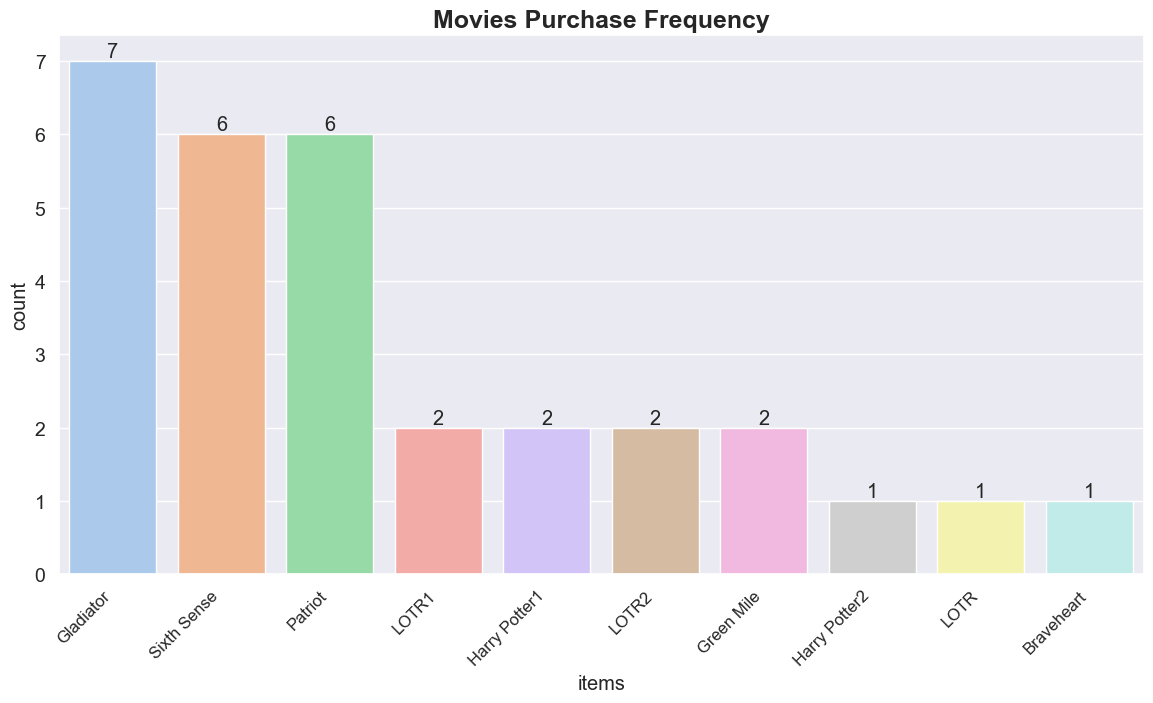

In [11]:
# Top 10 Popular items
count.sort_values(ascending=False, inplace=True)
count = count.to_frame().reset_index().rename(columns={'index': 'items', 0: 'count'})

plt.figure(figsize=(14, 7))
pastel_colors = sns.color_palette('pastel')[:10] 
ax = sns.barplot(x='items', y='count', data=count, palette=pastel_colors)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=14)
plt.title('Movies Purchase Frequency', fontsize=18, fontweight='bold')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Inference Drawn: Most Frequently Seen Movies are: Gladiator, Sixth Sense and Patriot

In [12]:
# Support and Length
# If we divide all items with row number, we can find Support value. Our threshold value is 0.2 for Support value.
first = pd.DataFrame(df.sum() / df.shape[0], columns=["Support"]).sort_values("Support", ascending=False)

In [13]:
# Elimination by Support Value
support_thresholds = [0.10, 0.15, 0.20]

for threshold in support_thresholds:
    print(f"\nElimination by Support Value (Threshold: {threshold})")
    print(first[first.Support >= threshold])


Elimination by Support Value (Threshold: 0.1)
               Support
Gladiator          0.7
Sixth Sense        0.6
Patriot            0.6
LOTR1              0.2
Harry Potter1      0.2
LOTR2              0.2
Green Mile         0.2
Harry Potter2      0.1
LOTR               0.1
Braveheart         0.1

Elimination by Support Value (Threshold: 0.15)
               Support
Gladiator          0.7
Sixth Sense        0.6
Patriot            0.6
LOTR1              0.2
Harry Potter1      0.2
LOTR2              0.2
Green Mile         0.2

Elimination by Support Value (Threshold: 0.2)
               Support
Gladiator          0.7
Sixth Sense        0.6
Patriot            0.6
LOTR1              0.2
Harry Potter1      0.2
LOTR2              0.2
Green Mile         0.2


In [14]:
# Association rules with 10% Support and 30% confidence
# With 10% Support
frequent_itemsets1 = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets1['length'] = frequent_itemsets1['itemsets'].apply(lambda x: len(x))

In [15]:
# Display Support values
print("\nSupport values with 10% Support:")
print(frequent_itemsets1)


Support values with 10% Support:
    support                                           itemsets  length
0       0.6                                      (Sixth Sense)       1
1       0.7                                        (Gladiator)       1
2       0.2                                            (LOTR1)       1
3       0.2                                    (Harry Potter1)       1
4       0.6                                          (Patriot)       1
5       0.2                                            (LOTR2)       1
6       0.1                                    (Harry Potter2)       1
7       0.1                                             (LOTR)       1
8       0.1                                       (Braveheart)       1
9       0.2                                       (Green Mile)       1
10      0.5                           (Sixth Sense, Gladiator)       2
11      0.1                               (LOTR1, Sixth Sense)       2
12      0.1                       (Harry Po

In [16]:
# Association rules with 30% Confidence
rules1 = association_rules(frequent_itemsets1, metric='confidence', min_threshold=0.3)

In [17]:
# Display rules
print("\nAssociation rules with 30% Confidence:")
print(rules1)


Association rules with 30% Confidence:
                      antecedents  \
0                   (Sixth Sense)   
1                     (Gladiator)   
2                         (LOTR1)   
3                 (Harry Potter1)   
4                   (Sixth Sense)   
..                            ...   
212  (Sixth Sense, Harry Potter1)   
213                  (Green Mile)   
214                       (LOTR2)   
215                       (LOTR1)   
216               (Harry Potter1)   

                                         consequents  antecedent support  \
0                                        (Gladiator)                 0.6   
1                                      (Sixth Sense)                 0.7   
2                                      (Sixth Sense)                 0.2   
3                                      (Sixth Sense)                 0.2   
4                                          (Patriot)                 0.6   
..                                               ...       

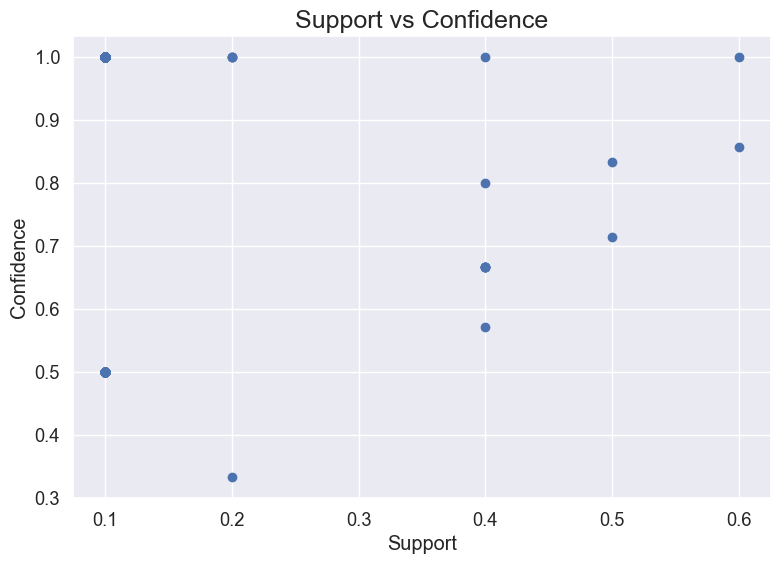

In [18]:
# Visualization of obtained rules
plt.figure(figsize=(9, 6))
plt.scatter(rules1['support'], rules1['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence', fontsize=18)
plt.show()

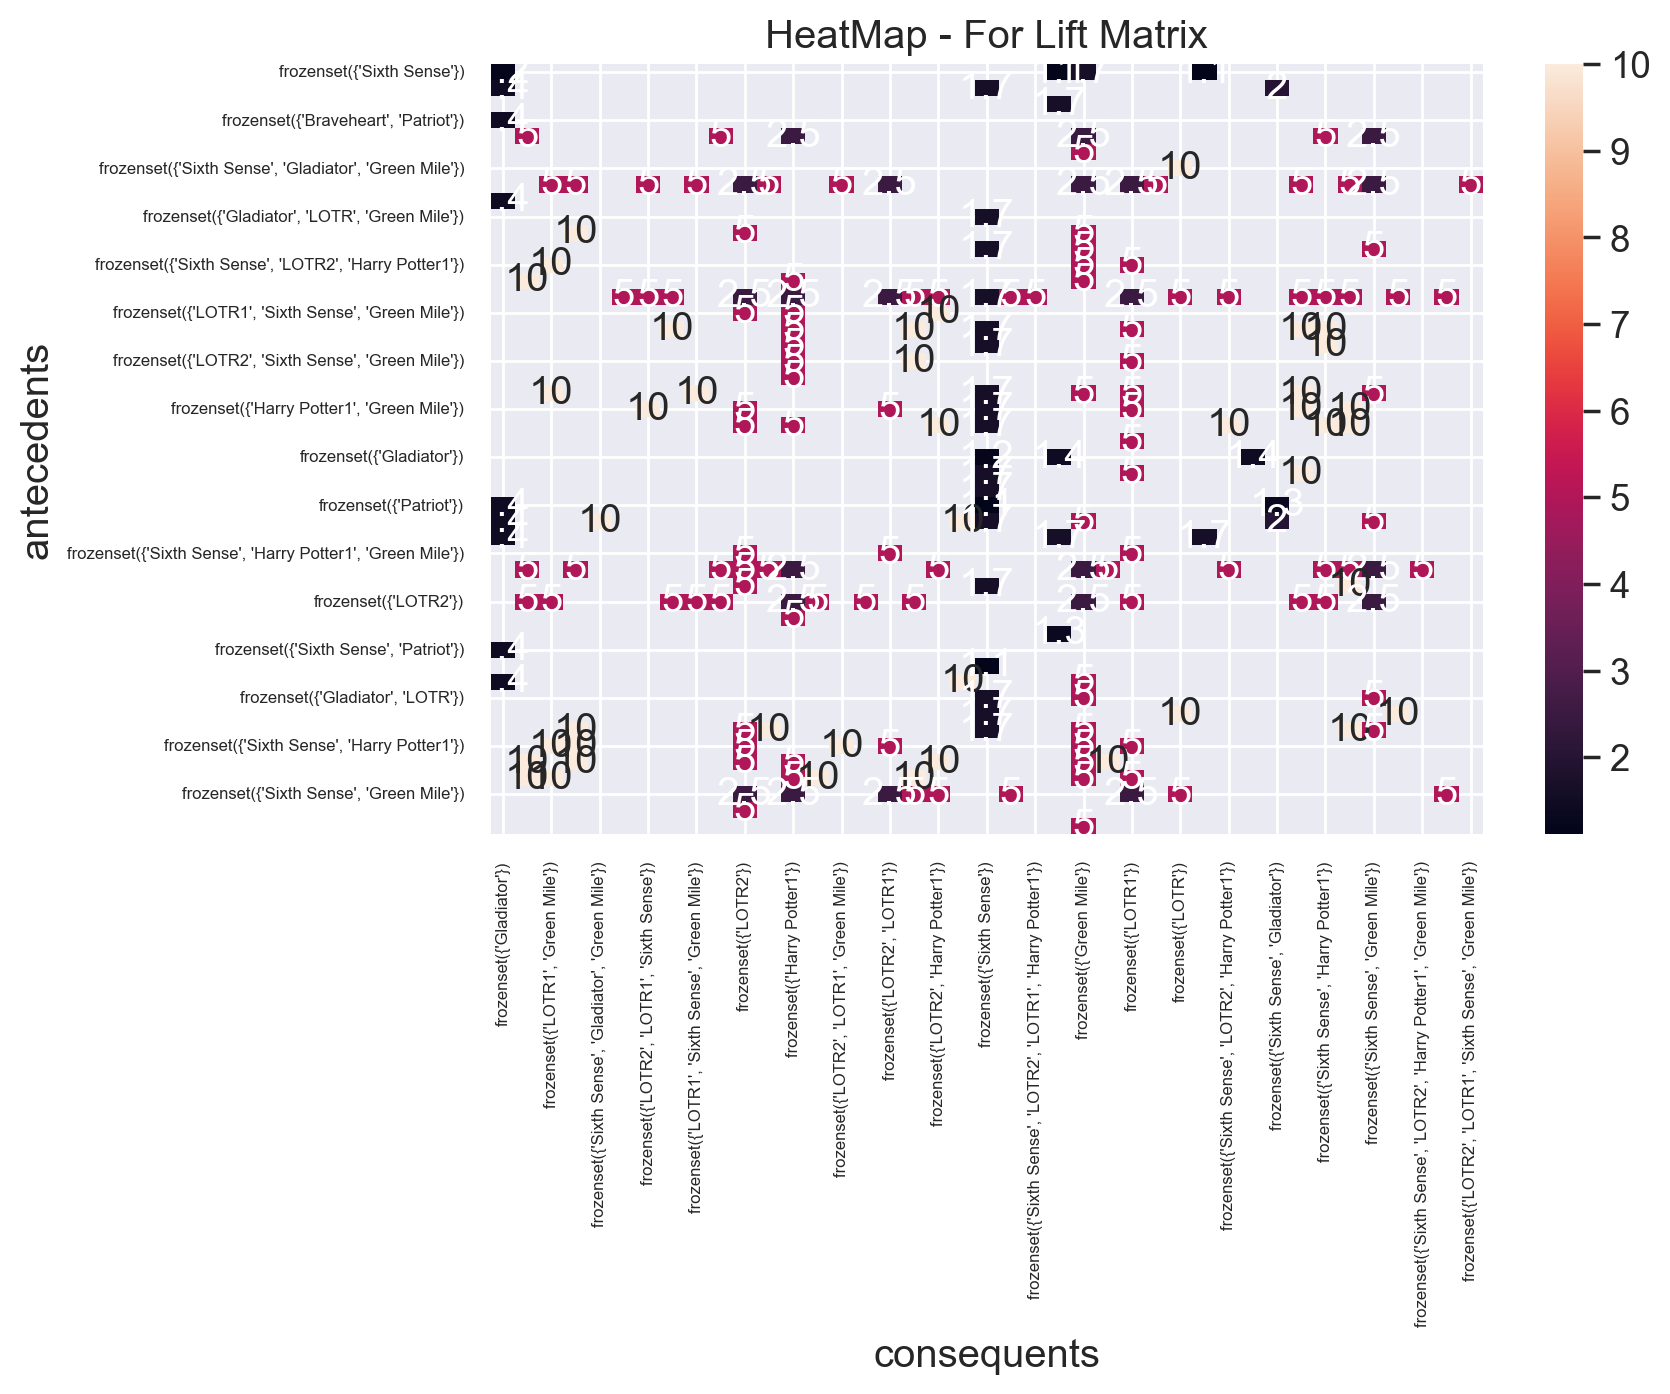

In [19]:
# Heatmap for Lift Matrix
matrix1 = rules1[rules1.lift > 1].pivot_table(index='antecedents', columns='consequents', values='lift', aggfunc='mean')
plt.figure(figsize=(8, 5), dpi=200)
sns.heatmap(matrix1, annot=True)
plt.title('HeatMap - For Lift Matrix')
plt.yticks(rotation=0, fontsize=6)
plt.xticks(rotation=90, fontsize=6)
plt.show()

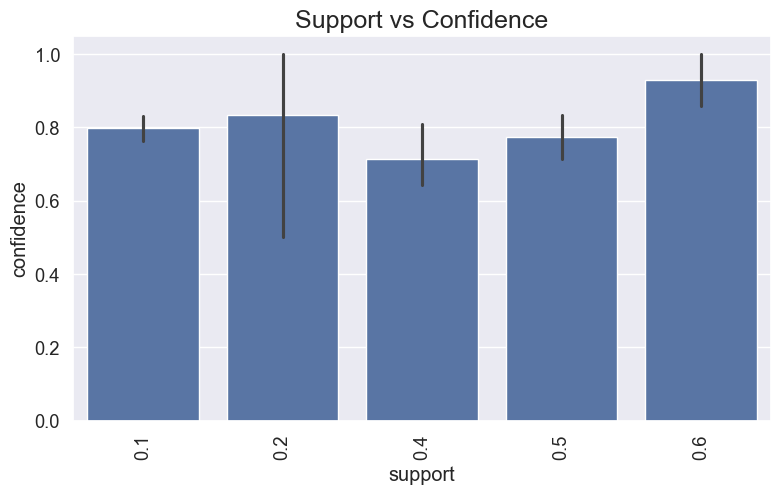

In [20]:
# Bar plot for Support vs Confidence
plt.figure(figsize=(9, 5), dpi=100)
sns.barplot(x="support", y="confidence", data=rules1)
plt.title("Support vs Confidence", fontsize=18)
plt.xticks(rotation=90)
plt.show()

In [21]:
# Association rules with 15% Support and 40% confidence
# With 15% Support
frequent_itemsets2 = apriori(df, min_support=0.15, use_colnames=True)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x: len(x))

In [22]:
# Display Support values
print("\nSupport values with 15% Support:")
print(frequent_itemsets2)


Support values with 15% Support:
    support                           itemsets  length
0       0.6                      (Sixth Sense)       1
1       0.7                        (Gladiator)       1
2       0.2                            (LOTR1)       1
3       0.2                    (Harry Potter1)       1
4       0.6                          (Patriot)       1
5       0.2                            (LOTR2)       1
6       0.2                       (Green Mile)       1
7       0.5           (Sixth Sense, Gladiator)       2
8       0.4             (Sixth Sense, Patriot)       2
9       0.2          (Sixth Sense, Green Mile)       2
10      0.6               (Gladiator, Patriot)       2
11      0.2                     (LOTR2, LOTR1)       2
12      0.4  (Sixth Sense, Gladiator, Patriot)       3


In [23]:
# Association rules with 40% Confidence
rules2 = association_rules(frequent_itemsets2, metric='confidence', min_threshold=0.4)

In [24]:
# Display rules
print("\nAssociation rules with 40% Confidence:")
print(rules2)


Association rules with 40% Confidence:
                 antecedents               consequents  antecedent support  \
0              (Sixth Sense)               (Gladiator)                 0.6   
1                (Gladiator)             (Sixth Sense)                 0.7   
2              (Sixth Sense)                 (Patriot)                 0.6   
3                  (Patriot)             (Sixth Sense)                 0.6   
4               (Green Mile)             (Sixth Sense)                 0.2   
5                (Gladiator)                 (Patriot)                 0.7   
6                  (Patriot)               (Gladiator)                 0.6   
7                    (LOTR2)                   (LOTR1)                 0.2   
8                    (LOTR1)                   (LOTR2)                 0.2   
9   (Sixth Sense, Gladiator)                 (Patriot)                 0.5   
10    (Sixth Sense, Patriot)               (Gladiator)                 0.4   
11      (Gladiator, Patr

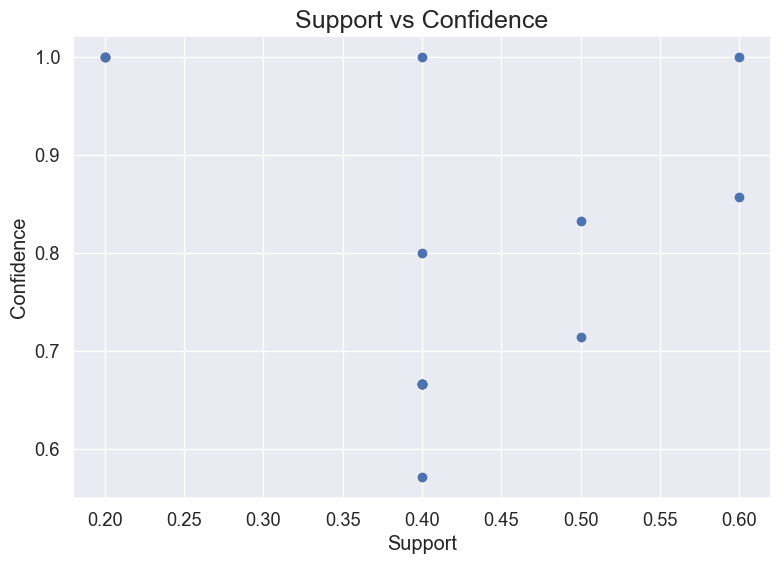

In [25]:
# Visualization of obtained rules
plt.figure(figsize=(9, 6))
plt.scatter(rules2['support'], rules2['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence', fontsize=18)
plt.show()

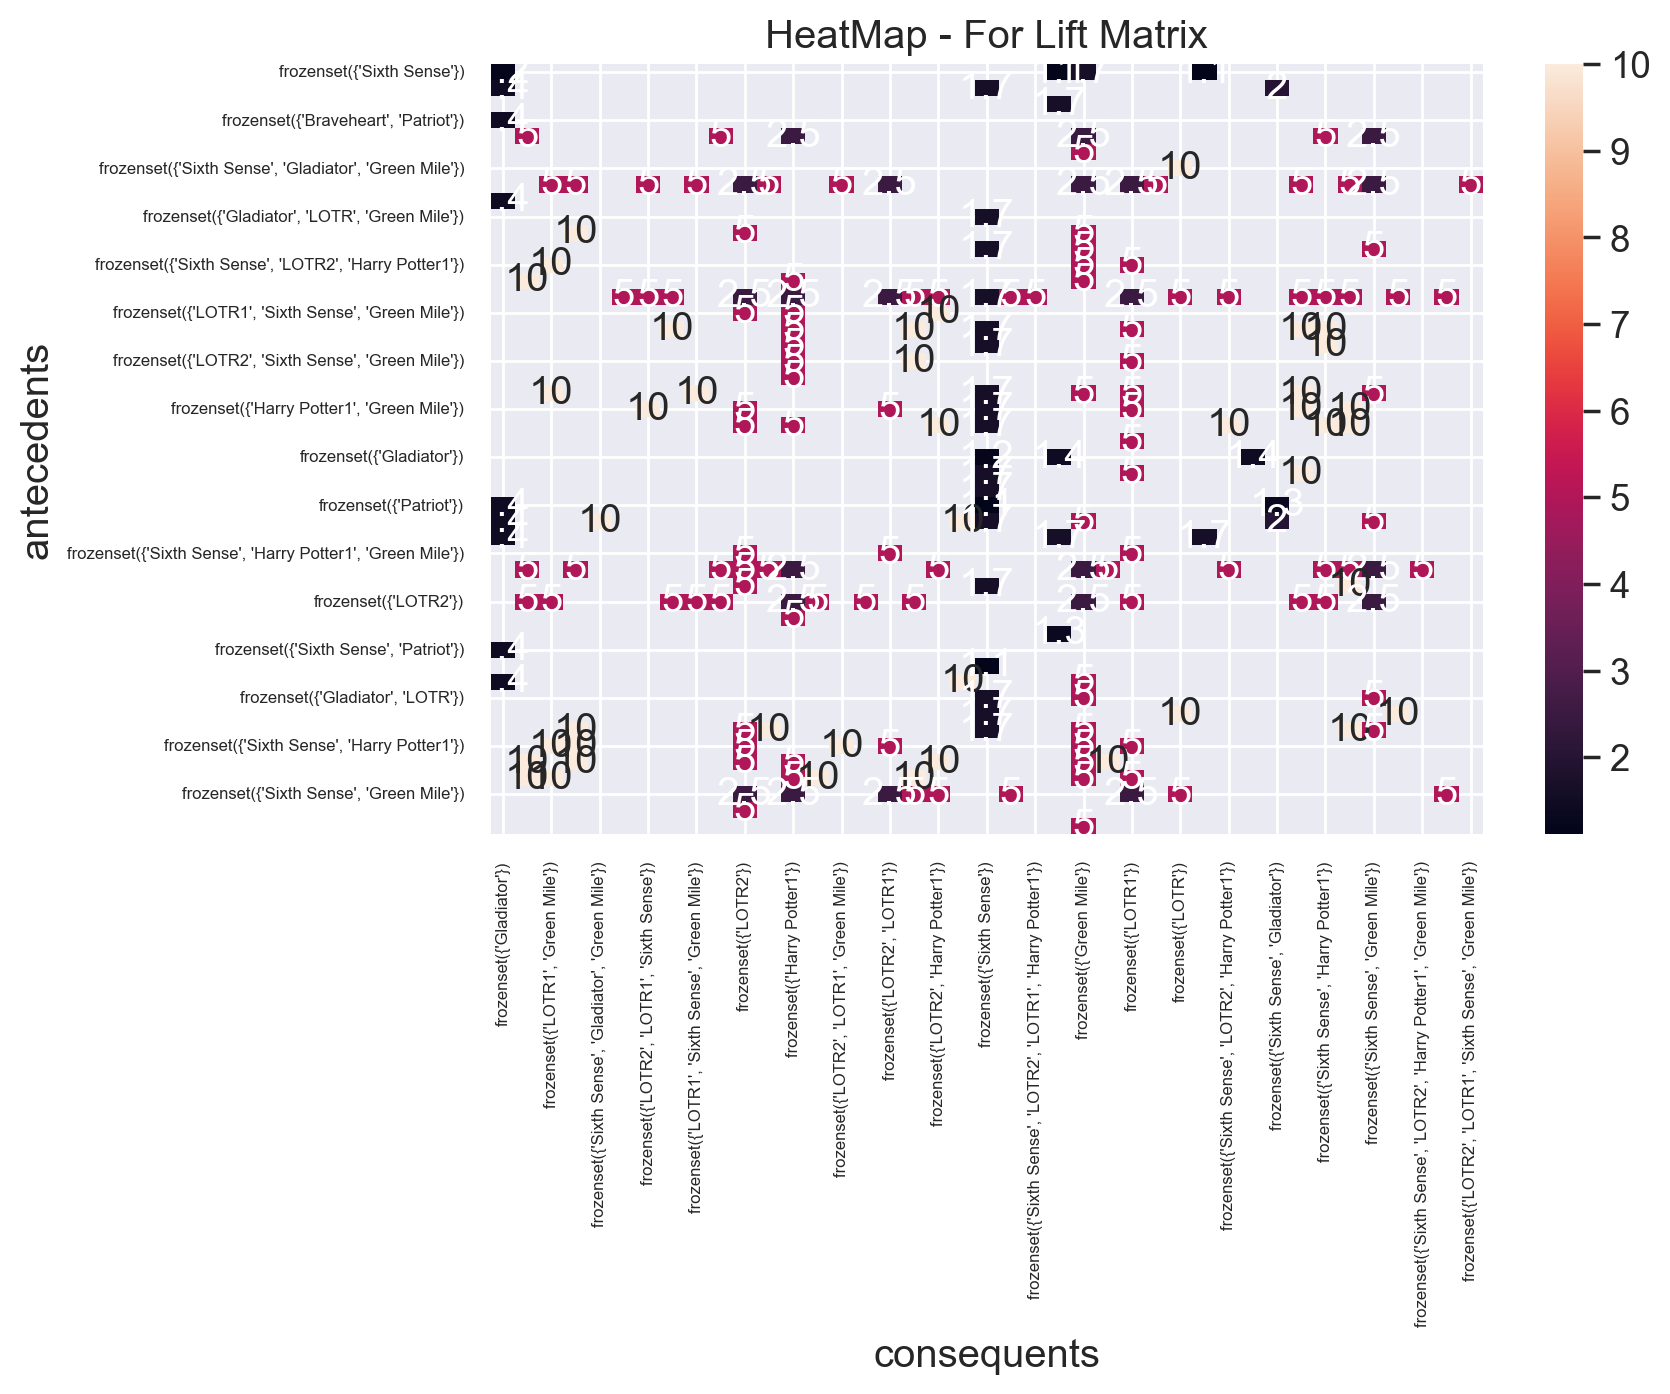

In [26]:
# Heatmap for Lift Matrix
matrix1 = rules1[rules1.lift > 1].pivot_table(index='antecedents', columns='consequents', values='lift', aggfunc='mean')
plt.figure(figsize=(8, 5), dpi=200)
sns.heatmap(matrix1, annot=True)
plt.title('HeatMap - For Lift Matrix')
plt.yticks(rotation=0, fontsize=6)
plt.xticks(rotation=90, fontsize=6)
plt.show()

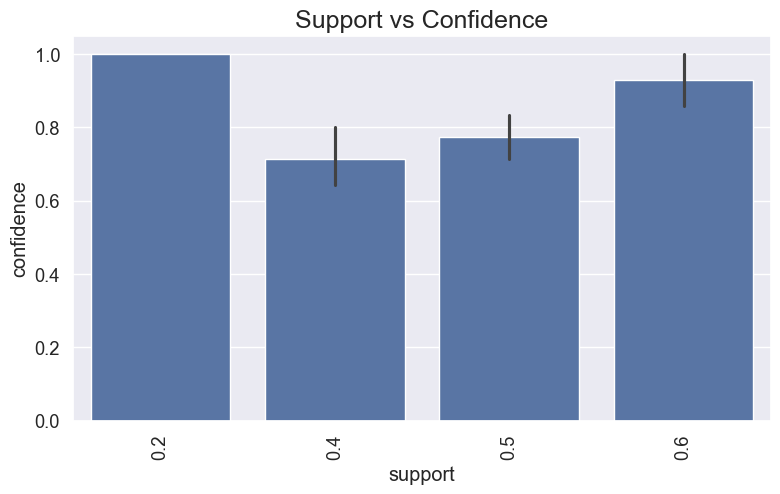

In [27]:
# Bar plot for Support vs Confidence
plt.figure(figsize=(9, 5), dpi=100)
sns.barplot(x="support", y="confidence", data=rules2)
plt.title("Support vs Confidence", fontsize=18)
plt.xticks(rotation=90)
plt.show()

In [28]:
# Association rules with 20% Support and 60% confidence
# With 20% Support
frequent_itemsets3 = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets3['length'] = frequent_itemsets3['itemsets'].apply(lambda x: len(x))


In [29]:
# Display Support values
print("\nSupport values with 20% Support:")
print(frequent_itemsets3)


Support values with 20% Support:
    support                           itemsets  length
0       0.6                      (Sixth Sense)       1
1       0.7                        (Gladiator)       1
2       0.2                            (LOTR1)       1
3       0.2                    (Harry Potter1)       1
4       0.6                          (Patriot)       1
5       0.2                            (LOTR2)       1
6       0.2                       (Green Mile)       1
7       0.5           (Sixth Sense, Gladiator)       2
8       0.4             (Sixth Sense, Patriot)       2
9       0.2          (Sixth Sense, Green Mile)       2
10      0.6               (Gladiator, Patriot)       2
11      0.2                     (LOTR2, LOTR1)       2
12      0.4  (Sixth Sense, Gladiator, Patriot)       3


In [30]:
# Association rules with 60% Confidence
rules3 = association_rules(frequent_itemsets3, metric='confidence', min_threshold=0.6)

In [31]:
# Display rules
print("\nAssociation rules with 60% Confidence:")
print(rules3)


Association rules with 60% Confidence:
                 antecedents               consequents  antecedent support  \
0              (Sixth Sense)               (Gladiator)                 0.6   
1                (Gladiator)             (Sixth Sense)                 0.7   
2              (Sixth Sense)                 (Patriot)                 0.6   
3                  (Patriot)             (Sixth Sense)                 0.6   
4               (Green Mile)             (Sixth Sense)                 0.2   
5                (Gladiator)                 (Patriot)                 0.7   
6                  (Patriot)               (Gladiator)                 0.6   
7                    (LOTR2)                   (LOTR1)                 0.2   
8                    (LOTR1)                   (LOTR2)                 0.2   
9   (Sixth Sense, Gladiator)                 (Patriot)                 0.5   
10    (Sixth Sense, Patriot)               (Gladiator)                 0.4   
11      (Gladiator, Patr

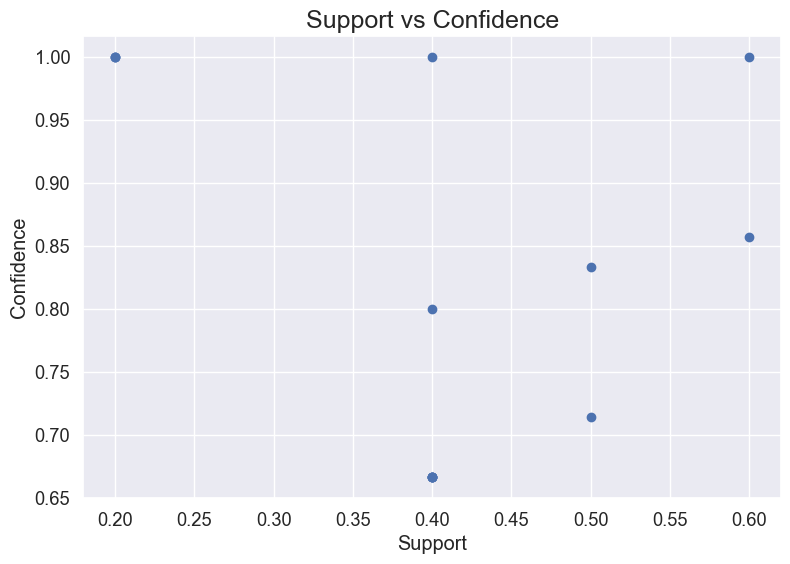

In [32]:
# Visualization of obtained rules
plt.figure(figsize=(9, 6))
plt.scatter(rules3['support'], rules3['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence', fontsize=18)
plt.show()

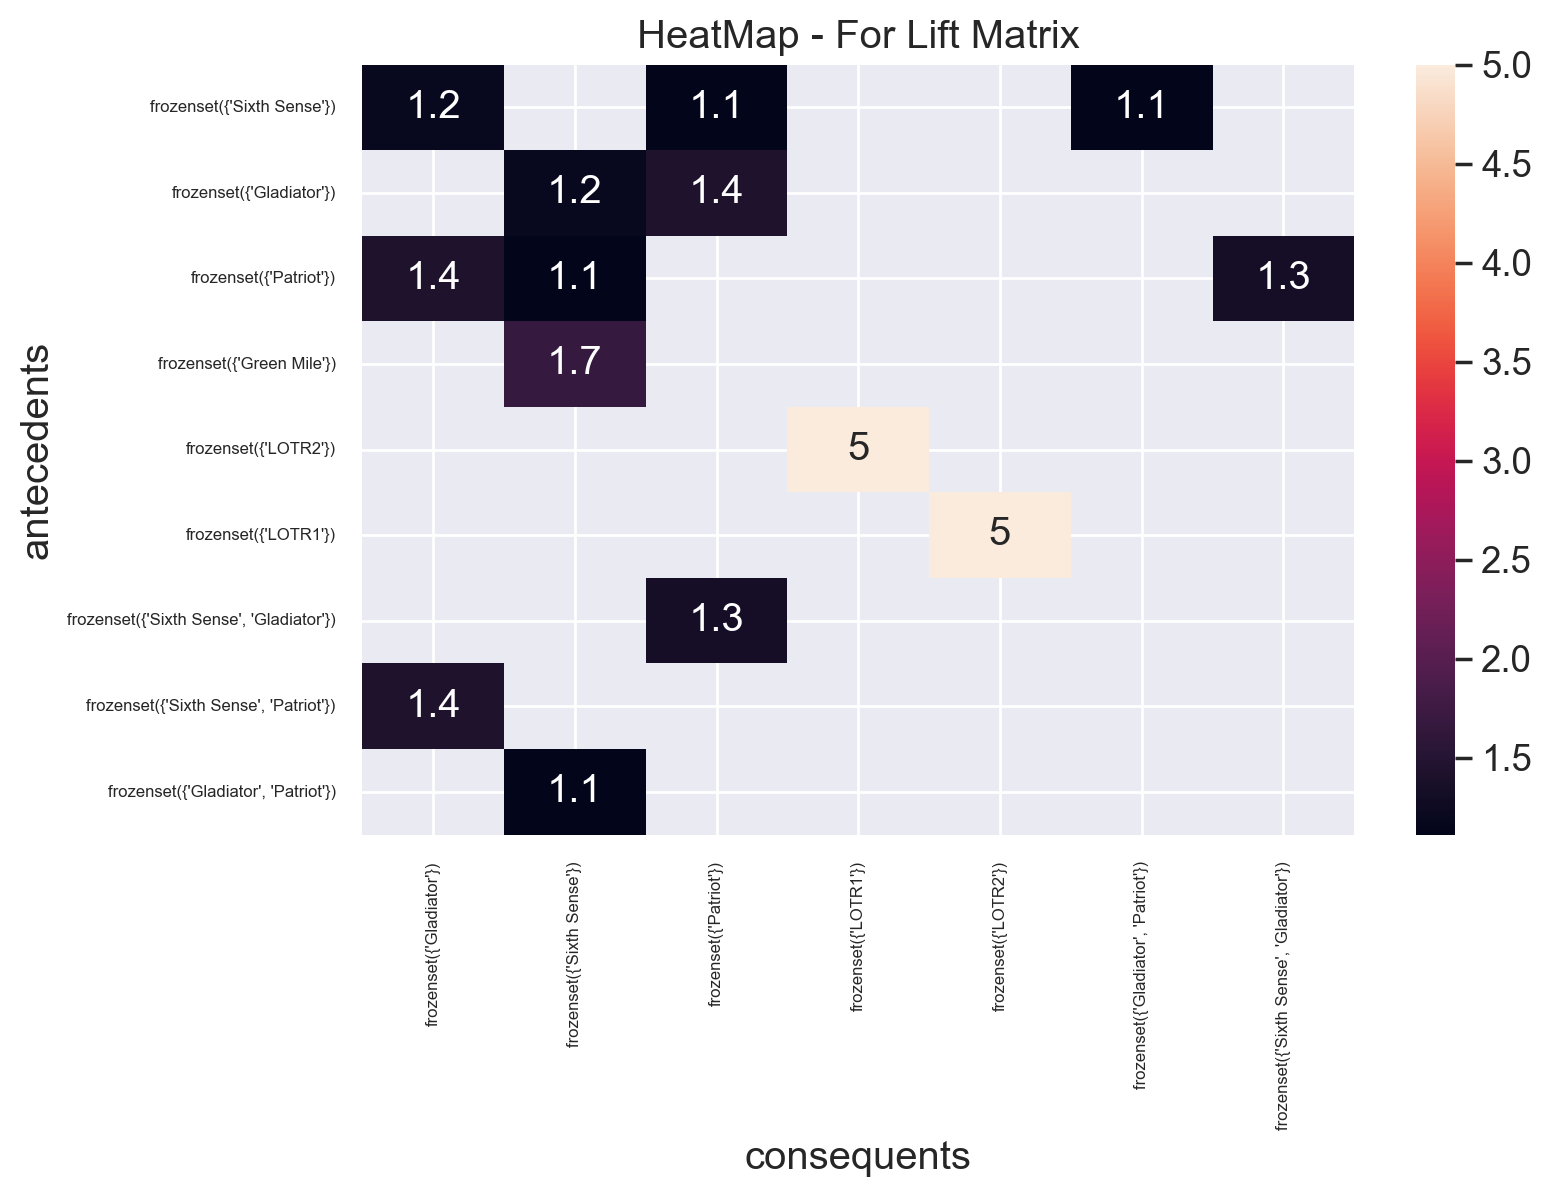

In [33]:
# Heatmap for Lift Matrix
matrix3 = rules3[rules3.lift > 1].pivot_table(index='antecedents', columns='consequents', values='lift', aggfunc='mean')
plt.figure(figsize=(8, 5), dpi=200)
sns.heatmap(matrix3, annot=True)
plt.title('HeatMap - For Lift Matrix')
plt.yticks(rotation=0, fontsize=6)
plt.xticks(rotation=90, fontsize=6)
plt.show()

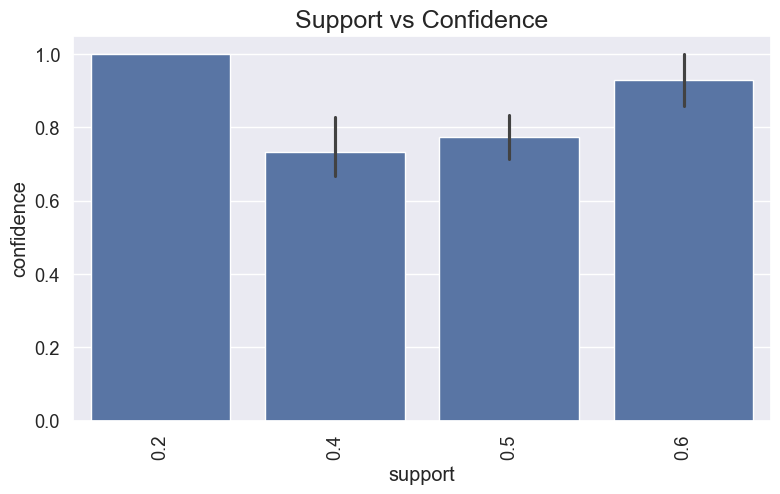

In [34]:
# Bar plot for Support vs Confidence
plt.figure(figsize=(9, 5), dpi=100)
sns.barplot(x="support", y="confidence", data=rules3)
plt.title("Support vs Confidence", fontsize=18)
plt.xticks(rotation=90)
plt.show()

In [38]:
# Print the number of rules for different support and confidence values
print("Number of Rules for 10% Support and 30% Confidence:", len(rules1))
print("Number of Rules for 15% Support and 40% Confidence:", len(rules2))
print("Number of Rules for 20% Support and 60% Confidence:", len(rules3))

Number of Rules for 10% Support and 30% Confidence: 217
Number of Rules for 15% Support and 40% Confidence: 15
Number of Rules for 20% Support and 60% Confidence: 14



Inference drawn:

High Number of Rules with Lower Confidence (10% Support and 30% Confidence):
- Implication: With a lower confidence threshold, the generated rules may include associations that are not strongly supported by the data. Implementing these rules could lead to recommendations or promotions that may not consistently reflect true patterns in customer behavior.
- Impact on Movie Selection: This approach might result in a variety of movie recommendations, but there is a risk of suggesting items that are not reliably associated with each other.

Moderate Number of Rules with Moderate Confidence (15% Support and 40% Confidence):
- Implication: The rules generated with higher confidence are more reliable in capturing meaningful associations in the data. They represent stronger patterns in customer behavior.
- Impact on Movie Selection: Implementing these rules could lead to more targeted and reliable recommendations. This may enhance the likelihood of influencing movie choices by suggesting items that are more likely to be watched together.

Few Rules with High Confidence (20% Support and 60% Confidence):
- Implication: The rules generated with a higher support threshold and confidence level are very strict and capture only the strongest associations. These rules are likely to be highly reliable but may be limited in scope.
- Impact on Movie Selection: Implementing these rules could lead to very specific and focused recommendations. While the number of rules is limited, the likelihood of increased enjoyment for the suggested movie combinations is higher due to the high confidence level.